In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Read in the data
myopia_df=pd.read_csv('myopia.csv')
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# remove myopic column and split the data
X = myopia_df.drop(columns=['MYOPIC'], axis=1)
y = myopia_df['MYOPIC']
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# scale the X data
scaler = StandardScaler()

In [5]:
# scale X data
X_scaled = scaler.fit_transform(X)

In [6]:
# perform dimensionality reduction with PCA
pca = PCA(n_components=0.90)
myo_pca = pca.fit_transform(X_scaled)


# use the shape attribute to tell the # of principal components
myo_pca.shape

(618, 10)

In [7]:
# print sum 
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [8]:
# RUN t-SNE model
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(myo_pca)

#shape t-SNE model
tsne_features.shape

/Users/preethivontela/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

In [9]:
# prepare to plot dataset

# first column of transformed features
x = tsne_features[:,0]

# the second column of transformed features
y = tsne_features[:,1]

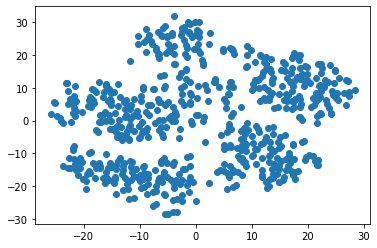

In [10]:
# visualize the clusters
plt.scatter(x, y)
plt.show()

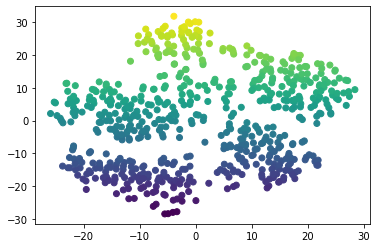

In [11]:
# visulize clusters with color added
plt.scatter(x, y, c=y)
plt.show()

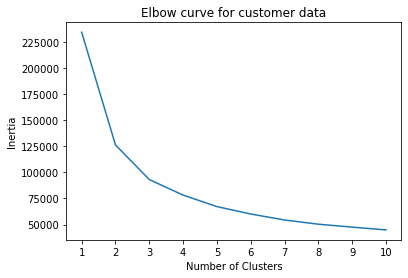

In [12]:
inertia = []
k = list(range(1,11))

# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)

# Plot the elbow curve 
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

# Recommendation
Based on the data, the patients can be cluster. There appears to be 4-5 distinct groups of patients that they can be clustered together.